## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.079143  0.782938 -1.757334  1.716118  1.298248  2.868224
1 -0.402235  0.726550 -1.623097  1.174136 -0.595128  1.476452
2 -1.635813  0.855340  0.089760  0.004882 -1.335519 -1.956329
3  1.367617 -0.597239  0.210942  1.667210 -0.779952  1.110834
4  0.429726 -1.459436  0.796663 -1.535665 -1.594900 -2.296372


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9282917	total: 69.5ms	remaining: 1m 9s
1:	learn: 0.9212533	total: 70.1ms	remaining: 35s
2:	learn: 0.9126920	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9043345	total: 71.3ms	remaining: 17.8s
4:	learn: 0.8951626	total: 71.9ms	remaining: 14.3s
5:	learn: 0.8871556	total: 72.4ms	remaining: 12s
6:	learn: 0.8784396	total: 72.9ms	remaining: 10.3s
7:	learn: 0.8709934	total: 73.4ms	remaining: 9.1s
8:	learn: 0.8638359	total: 73.9ms	remaining: 8.14s
9:	learn: 0.8549071	total: 74.5ms	remaining: 7.37s
10:	learn: 0.8467029	total: 74.9ms	remaining: 6.74s
11:	learn: 0.8369805	total: 75.4ms	remaining: 6.21s
12:	learn: 0.8281031	total: 76ms	remaining: 5.77s
13:	learn: 0.8194627	total: 76.6ms	remaining: 5.39s
14:	learn: 0.8122346	total: 77.1ms	remaining: 5.06s
15:	learn: 0.8043389	total: 77.6ms	remaining: 4.77s
16:	learn: 0.7970722	total: 78.3ms	remaining: 4.53s
17:	learn: 0.7909550	total: 78.8ms	remaining: 4.3s
18:	learn: 0.7848363	total: 79.3ms	remaining: 4.1s
1

86:	learn: 0.4556868	total: 110ms	remaining: 1.15s
87:	learn: 0.4532948	total: 110ms	remaining: 1.14s
88:	learn: 0.4500349	total: 111ms	remaining: 1.13s
89:	learn: 0.4463061	total: 111ms	remaining: 1.12s
90:	learn: 0.4435065	total: 112ms	remaining: 1.11s
91:	learn: 0.4400558	total: 112ms	remaining: 1.11s
92:	learn: 0.4369847	total: 113ms	remaining: 1.1s
93:	learn: 0.4334355	total: 113ms	remaining: 1.09s
94:	learn: 0.4306286	total: 113ms	remaining: 1.08s
95:	learn: 0.4276933	total: 114ms	remaining: 1.07s
96:	learn: 0.4247564	total: 115ms	remaining: 1.07s
97:	learn: 0.4219848	total: 115ms	remaining: 1.06s
98:	learn: 0.4190503	total: 116ms	remaining: 1.05s
99:	learn: 0.4160256	total: 116ms	remaining: 1.04s
100:	learn: 0.4132200	total: 117ms	remaining: 1.04s
101:	learn: 0.4096862	total: 117ms	remaining: 1.03s
102:	learn: 0.4069794	total: 118ms	remaining: 1.02s
103:	learn: 0.4038943	total: 118ms	remaining: 1.02s
104:	learn: 0.4010798	total: 118ms	remaining: 1.01s
105:	learn: 0.3980713	total

250:	learn: 0.1546336	total: 187ms	remaining: 558ms
251:	learn: 0.1537544	total: 188ms	remaining: 559ms
252:	learn: 0.1528930	total: 189ms	remaining: 558ms
253:	learn: 0.1519606	total: 189ms	remaining: 556ms
254:	learn: 0.1509589	total: 190ms	remaining: 555ms
255:	learn: 0.1500148	total: 190ms	remaining: 553ms
256:	learn: 0.1489933	total: 191ms	remaining: 552ms
257:	learn: 0.1481081	total: 191ms	remaining: 550ms
258:	learn: 0.1471678	total: 192ms	remaining: 549ms
259:	learn: 0.1463012	total: 192ms	remaining: 547ms
260:	learn: 0.1452027	total: 193ms	remaining: 546ms
261:	learn: 0.1444866	total: 193ms	remaining: 545ms
262:	learn: 0.1436168	total: 194ms	remaining: 543ms
263:	learn: 0.1427041	total: 194ms	remaining: 542ms
264:	learn: 0.1417468	total: 195ms	remaining: 540ms
265:	learn: 0.1408057	total: 195ms	remaining: 539ms
266:	learn: 0.1401026	total: 196ms	remaining: 537ms
267:	learn: 0.1392788	total: 196ms	remaining: 536ms
268:	learn: 0.1384602	total: 197ms	remaining: 535ms
269:	learn: 

471:	learn: 0.0462614	total: 293ms	remaining: 328ms
472:	learn: 0.0460381	total: 294ms	remaining: 327ms
473:	learn: 0.0457399	total: 294ms	remaining: 327ms
474:	learn: 0.0455215	total: 295ms	remaining: 326ms
475:	learn: 0.0452012	total: 295ms	remaining: 325ms
476:	learn: 0.0449280	total: 296ms	remaining: 324ms
477:	learn: 0.0447341	total: 296ms	remaining: 324ms
478:	learn: 0.0444493	total: 297ms	remaining: 323ms
479:	learn: 0.0442592	total: 298ms	remaining: 322ms
480:	learn: 0.0439901	total: 298ms	remaining: 322ms
481:	learn: 0.0437608	total: 298ms	remaining: 321ms
482:	learn: 0.0434861	total: 299ms	remaining: 320ms
483:	learn: 0.0432288	total: 299ms	remaining: 319ms
484:	learn: 0.0430476	total: 300ms	remaining: 318ms
485:	learn: 0.0427972	total: 300ms	remaining: 318ms
486:	learn: 0.0425781	total: 301ms	remaining: 317ms
487:	learn: 0.0423339	total: 301ms	remaining: 316ms
488:	learn: 0.0421201	total: 302ms	remaining: 315ms
489:	learn: 0.0419344	total: 302ms	remaining: 315ms
490:	learn: 

641:	learn: 0.0198185	total: 370ms	remaining: 207ms
642:	learn: 0.0197182	total: 371ms	remaining: 206ms
643:	learn: 0.0195978	total: 371ms	remaining: 205ms
644:	learn: 0.0194869	total: 372ms	remaining: 205ms
645:	learn: 0.0193975	total: 372ms	remaining: 204ms
646:	learn: 0.0193035	total: 373ms	remaining: 203ms
647:	learn: 0.0192103	total: 373ms	remaining: 203ms
648:	learn: 0.0191095	total: 374ms	remaining: 202ms
649:	learn: 0.0189897	total: 374ms	remaining: 201ms
650:	learn: 0.0188993	total: 375ms	remaining: 201ms
651:	learn: 0.0187860	total: 375ms	remaining: 200ms
652:	learn: 0.0186757	total: 376ms	remaining: 200ms
653:	learn: 0.0185909	total: 376ms	remaining: 199ms
654:	learn: 0.0185581	total: 376ms	remaining: 198ms
655:	learn: 0.0185282	total: 377ms	remaining: 198ms
656:	learn: 0.0184449	total: 378ms	remaining: 197ms
657:	learn: 0.0184128	total: 378ms	remaining: 197ms
658:	learn: 0.0183310	total: 379ms	remaining: 196ms
659:	learn: 0.0182996	total: 379ms	remaining: 195ms
660:	learn: 

864:	learn: 0.0076379	total: 476ms	remaining: 74.3ms
865:	learn: 0.0075997	total: 477ms	remaining: 73.8ms
866:	learn: 0.0075605	total: 477ms	remaining: 73.2ms
867:	learn: 0.0075368	total: 478ms	remaining: 72.7ms
868:	learn: 0.0074995	total: 478ms	remaining: 72.1ms
869:	learn: 0.0074629	total: 479ms	remaining: 71.5ms
870:	learn: 0.0074271	total: 479ms	remaining: 71ms
871:	learn: 0.0073914	total: 480ms	remaining: 70.4ms
872:	learn: 0.0073565	total: 480ms	remaining: 69.8ms
873:	learn: 0.0073186	total: 480ms	remaining: 69.2ms
874:	learn: 0.0072845	total: 481ms	remaining: 68.7ms
875:	learn: 0.0072495	total: 481ms	remaining: 68.1ms
876:	learn: 0.0072162	total: 482ms	remaining: 67.5ms
877:	learn: 0.0071792	total: 482ms	remaining: 67ms
878:	learn: 0.0071556	total: 482ms	remaining: 66.4ms
879:	learn: 0.0071193	total: 483ms	remaining: 65.8ms
880:	learn: 0.0070868	total: 483ms	remaining: 65.3ms
881:	learn: 0.0070513	total: 484ms	remaining: 64.7ms
882:	learn: 0.0070195	total: 484ms	remaining: 64.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

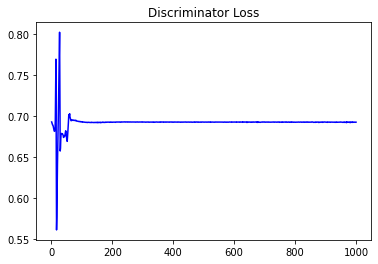

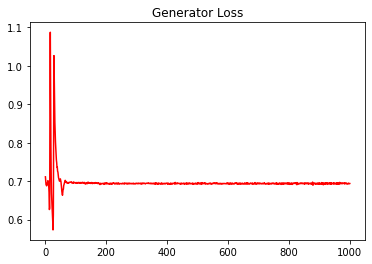

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.24073296022862636


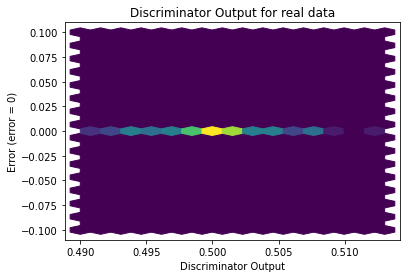

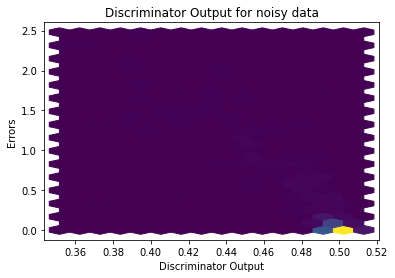

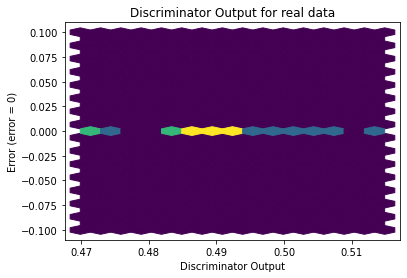

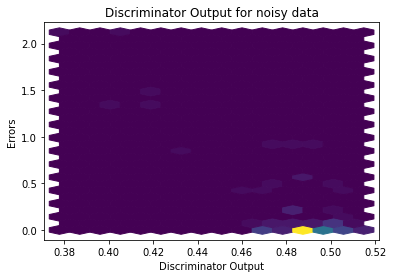

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


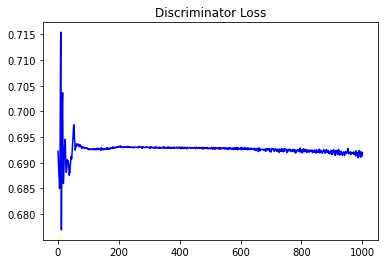

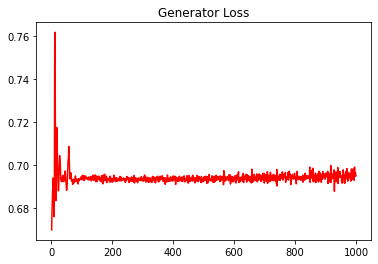

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.39764327688433376


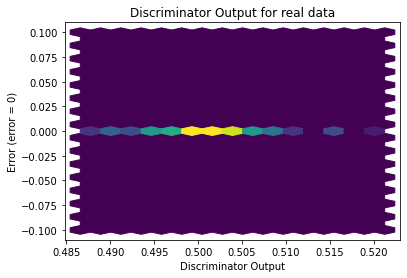

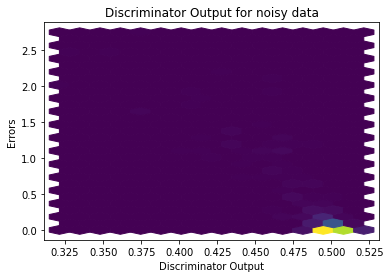

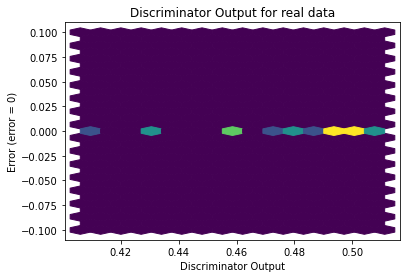

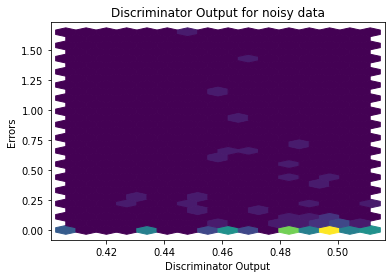

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4739]], requires_grad=True)
